# Biggest headlines by paper

This is a notebook that looks at the biggest headlines for newspapers over the last half-year, mainly for ten newspapers we particularly care about. It also looks at some interesting aspects of the largest headlines across all the papers.

In [159]:
from jupyter_cms.loader import load_notebook

eda = load_notebook('./data_exploration.ipynb')

df, newspapers = eda.load_data()

## Major newspaper headlines

These slugs were chosen from the Wikipedia page of widely circulated newspapers in the United States: https://en.wikipedia.org/wiki/List_of_newspapers_in_the_United_States#By_circulation. Unfortunately it seems like that list was using 2013 data, but I recognize enough of these papers as major that it's a close-enough approximation.

Also we have to leave the NYT and New York Post out, unfortunately, since pdfminer extracted their characters without being able to group them into lines and paragraphs. If taking character-level data and massaging it into paragraphs sounds like a fun task for you, please drop a Github issue or otherwise get in touch :)

In [177]:
slugs_of_interest = [
    'WSJ',
    'USAT',
    'CA_LAT',
    'CA_MN',
    'NY_DN',
    'DC_WP',
    'IL_CST',
    'CO_DP',
    'IL_CT',
    'TX_DMN'
]

In [160]:
import pandas as pd
from datetime import datetime

pd.set_option('display.max_columns', 100)

df.head(2)

,text,fontface,fontsize,bbox_left,bbox_bottom,bbox_right,bbox_top,bbox_area,avg_character_area,percent_of_page,page,page_width,page_height,page_area,date,day_of_week,weekend,slug,id,page_height_round,page_width_round,page_width_round_10,page_height_round_10,aspect_ratio
948,GET YOUR TICKETS!,SalvoSansExtraCond-Black,28.665,197.963,1413.262,352.508,1441.927,4430.032425,262.598379,0.004117,1,729.0,1476.0,1076004.0,2017-12-04,0,False,AL_TN,949,1476,729,720,1470,0.5
949,Styx is returning to the \nTuscaloosa Amphithe...,SalvoSans-Bold,14.250,197.963,1352.900,338.523,1411.150,8187.620000,76.041081,0.007609,1,729.0,1476.0,1076004.0,2017-12-04,0,False,AL_TN,950,1476,729,720,1470,0.5


In [165]:
df['month'] = df['date'].apply(lambda x: x.month)

In [226]:
def print_row(i, row):
    print("#{i}: {title} — {date:%b. %-d} — {fontsize:.2f}pt".format(
        i=i + 1,
        title=" ".join(row.text.split()),
        date=row.date,
        fontsize=row.fontsize))
    
def largest_font_headlines(npdf, paper):
    npdf = npdf[(npdf.bbox_top > npdf.page_height / 2) & (npdf.month >= 6)]
    top = npdf.sort_values(by='fontsize', ascending=False).head(10)
    print(paper)
    for i, (_, row) in enumerate(top.iterrows()):
        print_row(i, row)


In [227]:
# Um, definitely should have a better place for doing this, but on Dec 18th the WSJ PDF I archived was actually
# a different newspaper, somehow. I wonder if it's a Newseum error, but they don't keep their archives up beyond a day

largest_font_headlines(df[(df.slug == 'WSJ') & (df.date != datetime(2017, 12, 18))], 'The Wall Street Journal')

print()

largest_font_headlines(df[df.slug == 'USAT'], 'USA Today')

print()

largest_font_headlines(df[df.slug == 'CA_LAT'], 'Los Angeles Times')

print()

largest_font_headlines(df[df.slug == 'CA_MN'], 'San Jose Mercury News')

print()

largest_font_headlines(df[df.slug == 'NY_DN'], 'New York Daily News')

print()

largest_font_headlines(df[df.slug == 'DC_WP'], 'The Washington Post')

print()

largest_font_headlines(df[df.slug == 'IL_CST'], 'Chicago Sun Times')

print()

largest_font_headlines(df[df.slug == 'CO_DP'], 'The Denver Post')

print()

largest_font_headlines(df[df.slug == 'IL_CT'], 'Chicago Tribune')

print()

largest_font_headlines(df[df.slug == 'TX_DMN'], 'The Dallas Morning News')

The Wall Street Journal
#1: ‘It Was Just a Kill Box’ — Oct. 3 — 72.30pt
#2: Terror Strikes Barcelona — Aug. 18 — 67.36pt
#3: Terror Rampage in New York — Nov. 1 — 67.36pt
#4: Rain, Floods Deluge Texas — Aug. 28 — 67.36pt
#5: Battle Lines Drawn on Health Care — Jun. 23 — 56.15pt
#6: Trump Threatens to End Iran Deal — Oct. 14 — 56.15pt
#7: Hiring Growth Powers Economy — Dec. 9 — 56.15pt
#8: Senate Passes Budget Plan — Oct. 20 — 56.15pt
#9: Franken Bows to Pressure — Dec. 8 — 56.15pt
#10: Bankers Uneasy on Inflation — Oct. 16 — 56.15pt

USA Today
#1: CATASTROPHE — Aug. 28 — 128.94pt
#2: 09.20.17 THE WALL — Sep. 20 — 127.71pt
#3: ‘A COWARDLY ACT’ — Nov. 1 — 109.48pt
#4: ‘AN ACT OF PURE EVIL’ — Oct. 3 — 104.64pt
#5: Gunman kills 26 at church service — Nov. 6 — 88.06pt
#6: HARVEY COULD DRIVE 30,000 TO SHELTERS — Aug. 29 — 81.61pt
#7: Agony builds as water rises — Aug. 30 — 81.61pt
#8: TRUMP SAYS IT PLAINLY: ‘WE’RE GETTING OUT’ — Jun. 2 — 79.38pt
#9: Transgender troops in limbo — Jul. 27 — 78

## Other analyses!

So what else can we learn from the top sized headlines on these journals?

/ insert intermission where I switch into R and run ggplot to generate this graph: [link](https://sam.zhang.fyi/images/paper-fonts.png). Look at that graph if you haven't yet because it motivates some of the following.

We can see a wide distribution of biggest-headlines-per-day (what I'll ignorantly call the "splash" headline, please let me know if you know of the actual newspaper jargon) for each major newspaper. On the right-hand side, the tabloids tend to be extremely generous with how they use fonts. Let's see if that holds up at large.

As a refresher, here are some [common newspaper formats from Wikipedia](https://en.wikipedia.org/wiki/Newspaper_format):

```

    Diver's Dispatch 914.4 mm × 609.6 mm (36.00 in × 24.00 in) (1.5)
    Broadsheet 749 mm × 597 mm (29.5 in × 23.5 in) (1.255)
    Nordisch 570 mm × 400 mm (22 in × 16 in) (1.425)
    Rhenish around 350 mm × 520 mm (14 in × 20 in) (1.486)
    Swiss (Neue Zürcher Zeitung) 475 mm × 320 mm (18.7 in × 12.6 in) (1.484)
    Berliner 470 mm × 315 mm (18.5 in × 12.4 in) (1.492)
        The Guardian's printed area is 443 mm × 287 mm (17.4 in × 11.3 in).[2]
    Tabloid 430 mm × 280 mm (17 in × 11 in) (1.536)

```

We'll mainly just look at the height here for simplicity's sake.

Note these numbers will be slightly off since:
- the PDFs contain different amounts of additional padding compared to the actual printed version
- these numbers are in pixels, and depending on how the resolution of the newspaper is determined, could translate into different numbers in inches

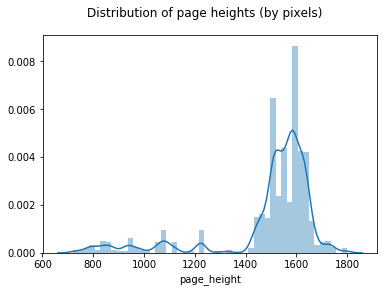

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df.groupby(['slug']).page_height.first())
plt.suptitle("Distribution of page heights (by pixels)")

So it looks like most of our newspapers are clustered around the 1600px height. But what is that in inches? Let's do a few known papers to check.

In [245]:
print('''Heights of known papers:

Broadsheets:
The Washington Post: {}px
The Wall Street Journal: {}px

Tabloids:
The Chicago Sun Times: {}px
The New York Daily News: {}px
'''.format(
    df[df.slug == 'DC_WP'].page_height.mode().iloc[0],
    df[df.slug == 'WSJ'].page_height.mode().iloc[0],
    df[df.slug == 'IL_CST'].page_height.mode().iloc[0],
    df[df.slug == 'NY_DN'].page_height.mode().iloc[0]
))

Heights of known papers:

Broadsheets:
The Washington Post: 1709.05px
The Wall Street Journal: 1567.8px

Tabloids:
The Chicago Sun Times: 720.0px
The New York Daily News: 878.4px



In [244]:
print('''Aspect ratios of known papers:

Broadsheets:
The Washington Post: {}
The Wall Street Journal: {}

Tabloids:
The Chicago Sun Times: {}
The New York Daily News: {}
'''.format(
    df[df.slug == 'DC_WP'].aspect_ratio.mode().iloc[0],
    df[df.slug == 'WSJ'].aspect_ratio.mode().iloc[0],
    df[df.slug == 'IL_CST'].aspect_ratio.mode().iloc[0],
    df[df.slug == 'NY_DN'].aspect_ratio.mode().iloc[0]
))

Aspect ratios of known papers:

Broadsheets:
The Washington Post: 0.6
The Wall Street Journal: 0.5

Tabloids:
The Chicago Sun Times: 1.1
The New York Daily News: 0.8



By our very rough check, the two broadsheets tended to be >1500px height with an aspect ratio around 1:2, and the tabloids are shorter with an aspect ratio around 1.

Let's see how this plays out with font sizes.

In [292]:
from scipy import stats
import numpy as np

def mode(heights):
    return stats.mode(heights).mode[0]

daily_headlines = df.groupby(['date', 'slug']).agg({'fontsize': max, 'page_height': mode, 'aspect_ratio': mode})

In [293]:
daily_headlines.head()

fontsize  page_height  aspect_ratio
date       slug                                        
2017-04-01 AK_FDNM    57.528      1593.36           0.5
           AL_AS      52.360      1512.00           0.5
           AL_DD      66.000      1512.00           0.5
           AL_DE     101.932      1584.00           0.5
           AL_GT      58.094      1584.00           0.5

In [294]:
avg_size_by_paper = daily_headlines.reset_index().groupby('slug').agg({'fontsize': np.mean, 'page_height': mode, 'aspect_ratio': mode, 'slug': 'count'}).rename(columns={'slug': 'n'})
avg_size_by_paper.head()

,fontsize,page_height,aspect_ratio,n
slug,,,,
AK_DN,63.871000,1584.00,0.5,2
AK_DSS,47.356186,1656.00,0.7,97
AK_FDNM,68.031140,1593.36,0.5,236
AK_JE,57.275935,1566.00,0.5,200
AL_ACO,99.147000,1746.00,0.5,4


count    740.000000
mean     147.635135
std       85.923381
min        1.000000
25%       56.750000
50%      182.000000
75%      231.000000
max      237.000000
Name: n, dtype: float64

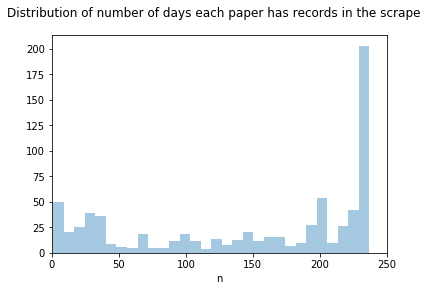

In [295]:
sns.distplot(avg_size_by_paper['n'], kde=False, bins=30)
plt.xlim([0, 250])
plt.suptitle("Distribution of number of days each paper has records in the scrape")

avg_size_by_paper['n'].describe()

In [296]:
avg_size_highly_present = avg_size_by_paper[avg_size_by_paper['n'] > 182]  # more than the median

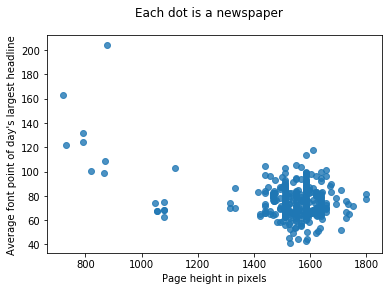

In [318]:
sns.regplot(avg_size_highly_present.page_height, avg_size_highly_present.fontsize, fit_reg=False)
plt.xlabel("Page height in pixels")
plt.ylabel("Average font point of day's largest headline")
plt.suptitle("Each dot is a newspaper")

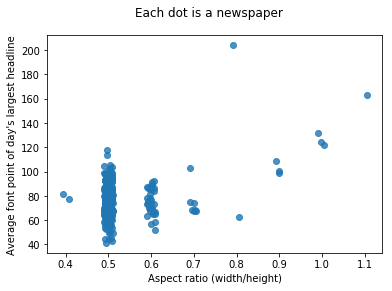

In [317]:
sns.regplot(avg_size_highly_present.aspect_ratio, avg_size_highly_present.fontsize, x_jitter=0.01, fit_reg=False)
plt.xlabel("Aspect ratio (width/height)")
plt.ylabel("Average font point of day's largest headline")
plt.suptitle("Each dot is a newspaper")

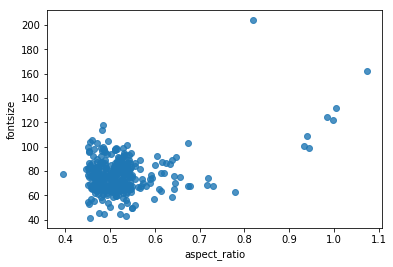

In [310]:
sns.regplot(avg_size_highly_present.aspect_ratio, avg_size_highly_present.fontsize, x_jitter=0.05, fit_reg=False)

Three observations:

1. There aren't that many "tabloids"! (if the page height and aspect ratio heuristics are accurate)
2. There is a clear pattern toward larger font-sizes on the higher aspect ratio, lower height end of the spectrum.
3. If we add a lot of jitter to the rounded aspect ratio, we end up with a very similar-looking graph to the height itself.

So what are those outliers?

In [306]:
avg_size_highly_present.sort_values(by='fontsize', ascending=False).head(10)

,fontsize,page_height,aspect_ratio,n
slug,,,,
NY_DN,203.829759,878.400,0.8,228
IL_CST,162.594638,720.000,1.1,232
NJ_TT,131.437970,792.000,1.0,233
PA_DCDT,124.709742,792.000,1.0,229
PA_PDN,121.913063,730.800,1.0,192
GA_AH,118.049375,1610.160,0.5,200
SC_IJ,113.504180,1584.000,0.5,222
NY_EDLP,108.456987,869.695,0.9,232
OH_TI,105.504005,1548.000,0.5,203


The biggest outliers with font size for tabloids turned out to be the ones in our most-circulated newspaper dataset, so my prior was skewed toward the large size. However, all 5 of the biggest font-using newspapers were "tabloids", so there is some truth to it. The data is a bit too categorical between broadsheet and tabloid, and I'm too fuzzy on the space in between, to make any overarching conclusions!

Let's go back and double-check how closely the height maps to the aspect ratio.

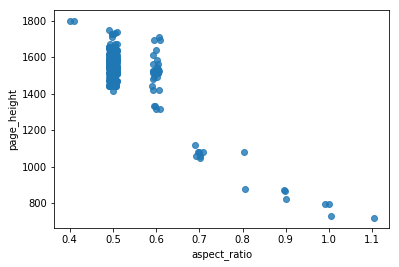

In [312]:
sns.regplot(avg_size_highly_present.aspect_ratio, avg_size_highly_present.page_height, x_jitter=0.01, fit_reg=False)